In [117]:
#DATA CLEANING

#1.Importing library

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import plotly.express as px
import geopandas as gpd

In [118]:
#2. Reading 2014 data

df_2014 = pd.read_csv('constituency_wise_results_2014.csv')
df_2014.head(5)

,state,pc_name,candidate,sex,age,category,party,party_symbol,general_votes,postal_votes,total_votes,total_electors
0,Andhra Pradesh,Adilabad,GODAM NAGESH,M,49.0,ST,TRS,Car,425762,5085,430847,1386282
1,Andhra Pradesh,Adilabad,NARESH,M,37.0,ST,INC,Hand,257994,1563,259557,1386282
2,Andhra Pradesh,Adilabad,RAMESH RATHOD,M,48.0,ST,TDP,Bicycle,182879,1319,184198,1386282
3,Andhra Pradesh,Adilabad,RATHOD SADASHIV,M,55.0,ST,BSP,Elephant,94363,57,94420,1386282
4,Andhra Pradesh,Adilabad,NETHAWATH RAMDAS,M,44.0,ST,IND,Auto- Rickshaw,41028,4,41032,1386282


In [119]:
#3. Reading 2019 data
 
df_2019 = pd.read_csv('constituency_wise_results_2019.csv')
df_2019.head(5)

,state,pc_name,candidate,sex,age,category,party,party_symbol,general_votes,postal_votes,total_votes,total_electors
0,Andhra Pradesh,Aruku,KISHORE CHANDRA DEO,MALE,72.0,ST,TDP,Bicycle,336163,1938,338101,1451418
1,Andhra Pradesh,Aruku,Dr. KOSURI KASI VISWANADHA VEERA VENKATA SATYA...,MALE,54.0,ST,BJP,Lotus,17578,289,17867,1451418
2,Andhra Pradesh,Aruku,GODDETI. MADHAVI,FEMALE,26.0,ST,YSRCP,Ceiling Fan,557561,4629,562190,1451418
3,Andhra Pradesh,Aruku,SHRUTI DEVI VYRICHERLA,FEMALE,46.0,ST,INC,Hand,17656,74,17730,1451418
4,Andhra Pradesh,Aruku,GANGULAIAH VAMPURU.,MALE,49.0,ST,JnP,Glass Tumbler,42245,549,42794,1451418


In [120]:
# 2. Reading 2014 data

df_sc = pd.read_csv('dim_states_codes.csv')
df_sc.head(5)

,state_name,abbreviation
0,Andaman & Nicobar Islands,AN
1,Andhra Pradesh,AP
2,Arunachal Pradesh,AR
3,Assam,AS
4,Bihar,BR


In [121]:
# renaming state_name to state to match it with other df
df_sc.rename(columns = {'state_name':'state'}, inplace=True)
df_sc.head(5)

,state,abbreviation
0,Andaman & Nicobar Islands,AN
1,Andhra Pradesh,AP
2,Arunachal Pradesh,AR
3,Assam,AS
4,Bihar,BR


In [122]:
 #5. Looking into DataTypes & Null Values of 2014 & 2019 columns

df_2014.info()
df_2019.info()

#null values in sex & age are for NOTA

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8355 entries, 0 to 8354
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   state           8355 non-null   object 
 1   pc_name         8355 non-null   object 
 2   candidate       8355 non-null   object 
 3   sex             7845 non-null   object 
 4   age             7845 non-null   float64
 5   category        7845 non-null   object 
 6   party           8355 non-null   object 
 7   party_symbol    8355 non-null   object 
 8   general_votes   8355 non-null   int64  
 9   postal_votes    8355 non-null   int64  
 10  total_votes     8355 non-null   int64  
 11  total_electors  8355 non-null   int64  
dtypes: float64(1), int64(4), object(7)
memory usage: 783.4+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8597 entries, 0 to 8596
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0

In [123]:
#6. Getting Unique Values
df_2014['state'].nunique()
df_2014['state'].unique()

array(['Andhra Pradesh', 'Arunachal Pradesh', 'Assam', 'Bihar', 'Goa',
       'Gujarat', 'Haryana', 'Himachal Pradesh', 'Jammu & Kashmir',
       'Karnataka', 'Kerala', 'Madhya Pradesh', 'Maharashtra', 'Manipur',
       'Meghalaya', 'Mizoram', 'Nagaland', 'Punjab', 'Rajasthan',
       'Sikkim', 'Tamil Nadu', 'Tripura', 'Uttar Pradesh', 'West Bengal',
       'Jharkhand', 'Uttarakhand', 'Andaman & Nicobar Islands',
       'Chandigarh', 'Dadra & Nagar Haveli', 'Daman & Diu',
       'NCT OF Delhi', 'Lakshadweep', 'Puducherry'], dtype=object)

In [124]:
df_2019['state'].nunique()
df_2019['state'].unique()

# State of AP gets bifurcation in 2014 and Telangana is formed.

array(['Andhra Pradesh', 'Arunachal Pradesh', 'Assam', 'Bihar', 'Goa',
       'Gujarat', 'Haryana', 'Himachal Pradesh', 'Jammu & Kashmir',
       'Karnataka', 'Kerala', 'Madhya Pradesh', 'Maharashtra', 'Manipur',
       'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha', 'Punjab',
       'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Tripura', 'Uttar Pradesh',
       'West Bengal', 'Chhattisgarh', 'Jharkhand', 'Uttarakhand',
       'Telangana', 'Andaman & Nicobar Islands', 'Chandigarh',
       'Dadra & Nagar Haveli', 'Daman & Diu', 'NCT OF Delhi',
       'Lakshadweep', 'Puducherry'], dtype=object)

In [125]:
 #7. Replacing state name for Telengana constituencies in df_2014
 # getting constituencies that got seperated in 2014 from AP
df_2019[df_2019['state']=='Telangana']['pc_name'].unique()


array(['Adilabad ', 'Peddapalle ', 'Karimnagar ', 'Nizamabad',
       'Zahirabad', 'Medak', 'Malkajgiri', 'Secundrabad', 'Hyderabad',
       'CHEVELLA', 'Mahbubnagar', 'Nagarkurnool', 'Nalgonda', 'Bhongir ',
       'Warangal', 'Mahabubabad  ', 'Khammam '], dtype=object)

In [126]:
telangana_pc_names = ['Adilabad ', 'Peddapalle ', 'Karimnagar ', 'Nizamabad',
 'Zahirabad', 'Medak', 'Malkajgiri', 'Secundrabad', 'Hyderabad',
 'CHEVELLA', 'Mahbubnagar', 'Nagarkurnool', 'Nalgonda', 'Bhongir ',
 'Warangal', 'Mahabubabad ', 'Khammam ']

In [127]:
df_2014.loc[df_2014['pc_name'].isin(telangana_pc_names), 'state'] = 'Telangana'
df_2014['state'].unique()

array(['Telangana', 'Andhra Pradesh', 'Arunachal Pradesh', 'Assam',
       'Bihar', 'Goa', 'Gujarat', 'Haryana', 'Himachal Pradesh',
       'Jammu & Kashmir', 'Karnataka', 'Kerala', 'Madhya Pradesh',
       'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland',
       'Punjab', 'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Tripura',
       'Uttar Pradesh', 'West Bengal', 'Jharkhand', 'Uttarakhand',
       'Andaman & Nicobar Islands', 'Chandigarh', 'Dadra & Nagar Haveli',
       'Daman & Diu', 'NCT OF Delhi', 'Lakshadweep', 'Puducherry'],
      dtype=object)

In [128]:
df_2014['state'].nunique()
 #telangana has been adde

34

In [129]:
 #8. Replacing consituencies name
 #Few states have same constituency names. So replacing constituency name followed by the respective
 #state name to differentiate

counts = df_2014.groupby('pc_name').size()

In [130]:
for index, row in df_2014.iterrows():
   if counts[row['pc_name']] > 1:
       df_2014.at[index, 'pc_name'] = f"{row['pc_name']}_{row['state']}"

In [131]:
countb = df_2019.groupby('pc_name').size()

In [132]:
for index, row in df_2019.iterrows():
     if countb[row['pc_name']] > 1:
          df_2019.at[index, 'pc_name'] = f"{row['pc_name']}_{row['state']}"

In [133]:
df_2019.head(3)

,state,pc_name,candidate,sex,age,category,party,party_symbol,general_votes,postal_votes,total_votes,total_electors
0,Andhra Pradesh,Aruku _Andhra Pradesh,KISHORE CHANDRA DEO,MALE,72.0,ST,TDP,Bicycle,336163,1938,338101,1451418
1,Andhra Pradesh,Aruku _Andhra Pradesh,Dr. KOSURI KASI VISWANADHA VEERA VENKATA SATYA...,MALE,54.0,ST,BJP,Lotus,17578,289,17867,1451418
2,Andhra Pradesh,Aruku _Andhra Pradesh,GODDETI. MADHAVI,FEMALE,26.0,ST,YSRCP,Ceiling Fan,557561,4629,562190,1451418


In [134]:
#10. Obtaining the descriptive statistics for the dataframe
df_2014.describe()
df_2019.describe()

,age,general_votes,postal_votes,total_votes,total_electors
count,8054.000000,8.597000e+03,8597.000000,8.597000e+03,8.597000e+03
mean,47.065185,7.117290e+04,267.469699,7.144037e+04,1.705181e+06
std,12.140434,1.735669e+05,929.319680,1.742342e+05,2.969405e+05
min,24.000000,8.400000e+01,0.000000,8.400000e+01,5.518900e+04
25%,38.000000,1.315000e+03,1.000000,1.317000e+03,1.553385e+06
50%,46.000000,3.341000e+03,4.000000,3.350000e+03,1.703279e+06
75%,56.000000,1.239100e+04,36.000000,1.242100e+04,1.856791e+06
max,90.000000,1.066824e+06,19367.000000,1.068569e+06,3.150313e+06


In [135]:
#Data Analysis & Visualisation

#1. List top 5/bottom 5 constituencies of 2014 and 2019 in terms of voter turnout ratio

#2014
#Voter Turnout Ratio = (Total Votes Cast / Total Electors)× 100%
#The percentage of registered voters who actually cast their votes in an election 

voter_turnout_ratio_2014 = round((df_2014.groupby('pc_name')['total_votes'].sum()
/df_2014.groupby('pc_name')['total_electors'].max())*100,2)


In [136]:
 #top 5
voter_turnout_ratio_2014_desc = voter_turnout_ratio_2014.sort_values(ascending=False)
top5_constituencies14 = voter_turnout_ratio_2014_desc.head(5)
top5_constituencies14

pc_name
Dhubri_Assam             88.35
Nagaland_Nagaland        87.82
Tamluk_West Bengal       87.59
Bishnupur_West Bengal    86.72
Kanthi_West Bengal       86.61
dtype: float64

In [137]:
#bottom 5
voter_turnout_ratio_2014_asc = voter_turnout_ratio_2014.sort_values()
bottom5_constituencies14 = voter_turnout_ratio_2014_asc.head(5)
bottom5_constituencies14

pc_name
Srinagar_Jammu & Kashmir     25.86
Anantnag_Jammu & Kashmir     28.84
Baramulla_Jammu & Kashmir    39.13
Kalyan_Maharashtra           42.88
Patna Sahib_Bihar            45.33
dtype: float64

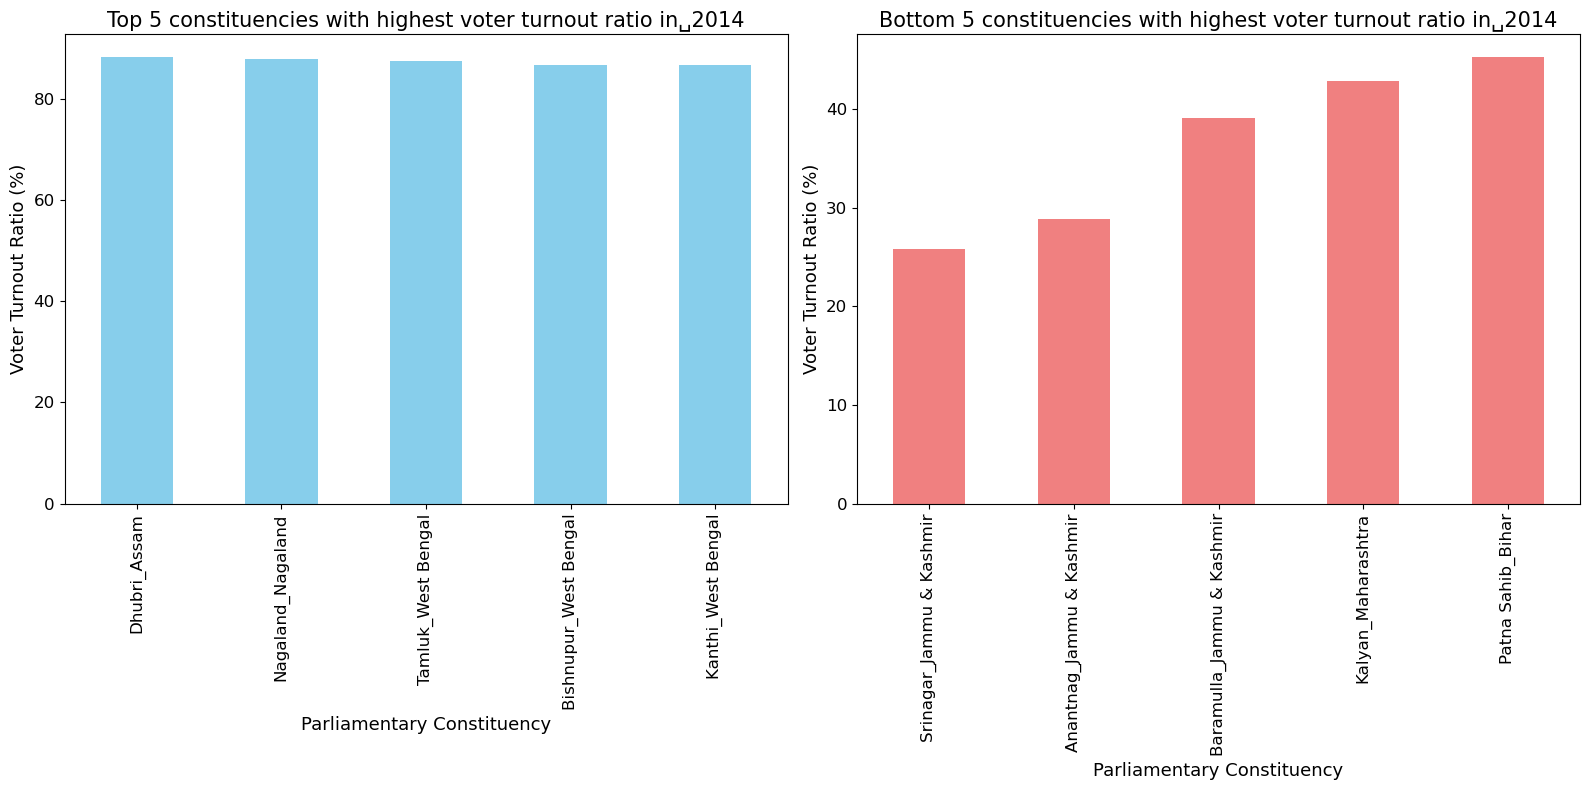

In [138]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16,8))
top5_constituencies14.plot(kind='bar',ax=axes[0], color='skyblue')
axes[0].set_title('Top 5 constituencies with highest voter turnout ratio in␣2014', size=15)
axes[0].set_xlabel('Parliamentary Constituency', size=13)
axes[0].set_ylabel('Voter Turnout Ratio (%)', size=13)
axes[0].tick_params(axis='x', labelsize=12)
axes[0].tick_params(axis='y', labelsize=12)
bottom5_constituencies14.plot(kind='bar',ax=axes[1], color='lightcoral')
axes[1].set_title('Bottom 5 constituencies with highest voter turnout ratio in␣2014', size=15)
axes[1].set_xlabel('Parliamentary Constituency', size=13)
axes[1].set_ylabel('Voter Turnout Ratio (%)', size=13)
axes[1].tick_params(axis='x', labelsize=12)
axes[1].tick_params(axis='y', labelsize=12)
plt.tight_layout()
plt.show()

In [139]:
#2019
#Voter Turnout Ratio = (Total Votes Cast / Total Electors)× 100%
#The percentage of registered voters who actually cast their votes in an election.
voter_turnout_ratio_2019 = round((df_2019.groupby('pc_name')['total_votes'].sum()
/df_2019.groupby('pc_name')['total_electors']
 .max())*100,2)

voter_turnout_ratio_2019

pc_name
ARUNACHAL EAST_Arunachal Pradesh    86.46
ARUNACHAL WEST_Arunachal Pradesh    77.26
Adilabad _Telangana                 71.40
Agra_Uttar Pradesh                  59.11
Ahmadnagar _Maharashtra             64.67
                                    ...  
Warangal_Telangana                  63.69
Wardha_Maharashtra                  61.53
Wayanad_Kerala                      80.33
Yavatmal-Washim_Maharashtra         61.28
Zahirabad_Telangana                 69.69
Length: 543, dtype: float64

In [140]:
 #top 5
voter_turnout_ratio_2019_desc = voter_turnout_ratio_2019.sort_values(ascending=False)
top5_constituencies19 = voter_turnout_ratio_2019_desc.head(5)
top5_constituencies19

pc_name
Dhubri_Assam                        90.66
Bishnupur_West Bengal               87.31
Barpeta_Assam                       86.55
Jalpaiguri_West Bengal              86.49
ARUNACHAL EAST_Arunachal Pradesh    86.46
dtype: float64

In [141]:
 #bottom 5
voter_turnout_ratio_2019_asc = voter_turnout_ratio_2019.sort_values()
bottom5_constituencies19 = voter_turnout_ratio_2019_asc.head(5)
bottom5_constituencies19

pc_name
Anantnag_Jammu & Kashmir      8.94
Srinagar_Jammu & Kashmir     14.43
Baramulla_Jammu & Kashmir    34.57
Hyderabad_Telangana          44.84
Kalyan_Maharashtra           45.29
dtype: float64

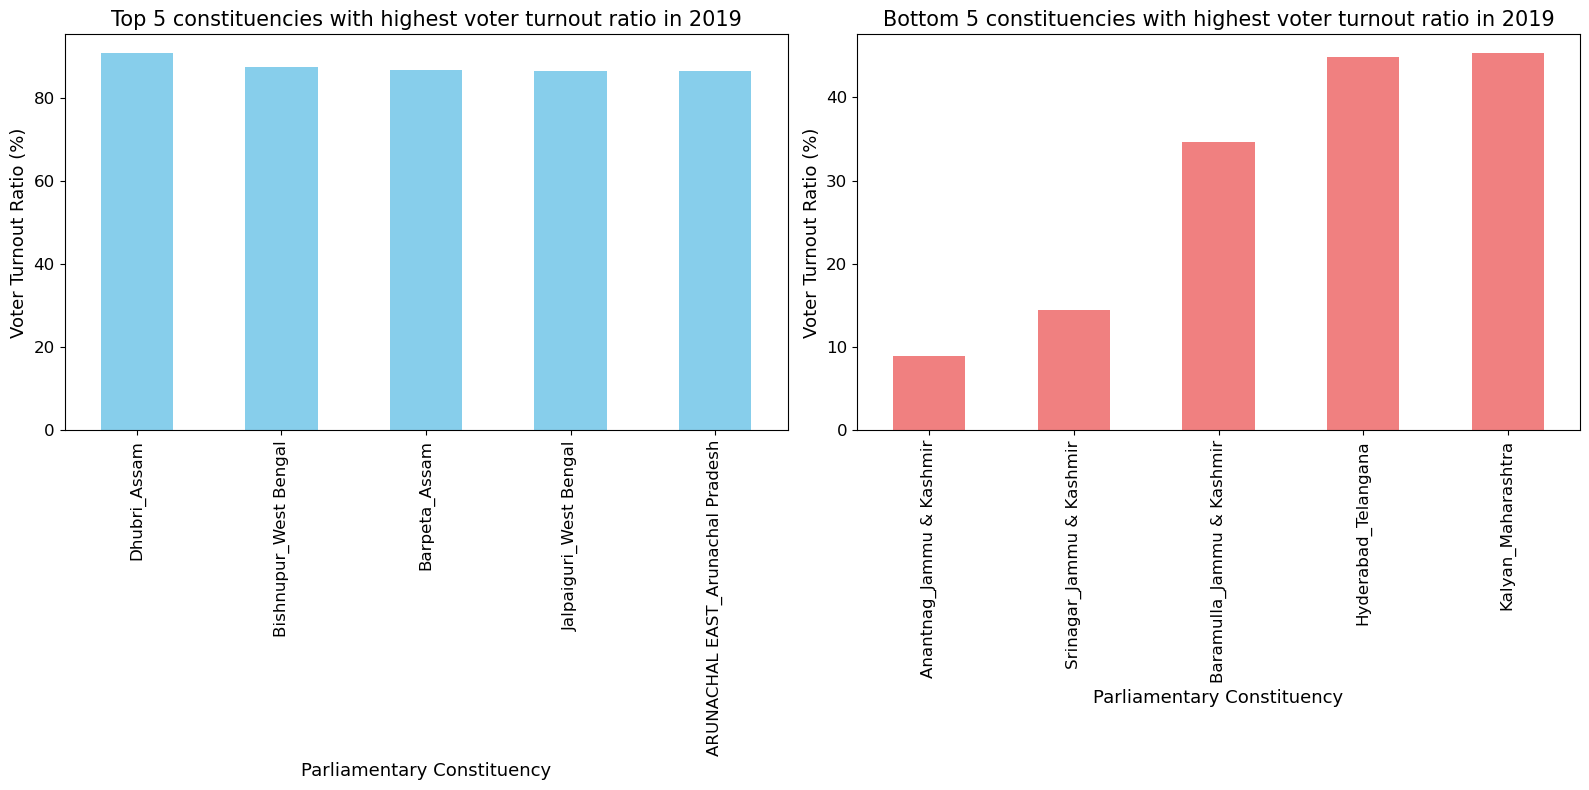

In [142]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16,8))
top5_constituencies19.plot(kind='bar',ax=axes[0], color='skyblue')
axes[0].set_title('Top 5 constituencies with highest voter turnout ratio in 2019', size=15)
axes[0].set_xlabel('Parliamentary Constituency', size=13)
axes[0].set_ylabel('Voter Turnout Ratio (%)', size=13)
axes[0].tick_params(axis='x', labelsize=12)
axes[0].tick_params(axis='y', labelsize=12)
bottom5_constituencies19.plot(kind='bar',ax=axes[1], color='lightcoral')
axes[1].set_title('Bottom 5 constituencies with highest voter turnout ratio in 2019', size=15)
axes[1].set_xlabel('Parliamentary Constituency', size=13)
axes[1].set_ylabel('Voter Turnout Ratio (%)', size=13)
axes[1].tick_params(axis='x', labelsize=12)
axes[1].tick_params(axis='y', labelsize=12)
plt.tight_layout()
plt.show()

In [143]:
#2. List top 5/bottom 5 states of 2014 and 2019 in terms of voter turnout ratio

#2014
#getting unique totalelectors per pc_name
unique_df_2014 = df_2014.drop_duplicates(subset=['pc_name'])

#getting totalelectors per state
total_electors_state14 = unique_df_2014.groupby('state')['total_electors'].sum()

#getting totalvotes per state
total_voters_state14 = df_2014.groupby('state')['total_votes'].sum()

#getting voter_turnout_ratio_2014 by state
voter_turnout_ratio_state14 = round((total_voters_state14/total_electors_state14)*100,2)

In [144]:
#top5
top5_state14 = voter_turnout_ratio_state14.sort_values(ascending=False).head(5)
top5_state14

state
Nagaland                87.82
Lakshadweep             86.61
Tripura                 84.72
Dadra & Nagar Haveli    84.07
Sikkim                  83.33
dtype: float64

In [145]:
#bottom5
bottom5_state14 = voter_turnout_ratio_state14.sort_values().head(5)
bottom5_state14

state
Jammu & Kashmir    49.66
Bihar              56.25
Uttar Pradesh      58.42
Maharashtra        60.29
Madhya Pradesh     61.59
dtype: float64

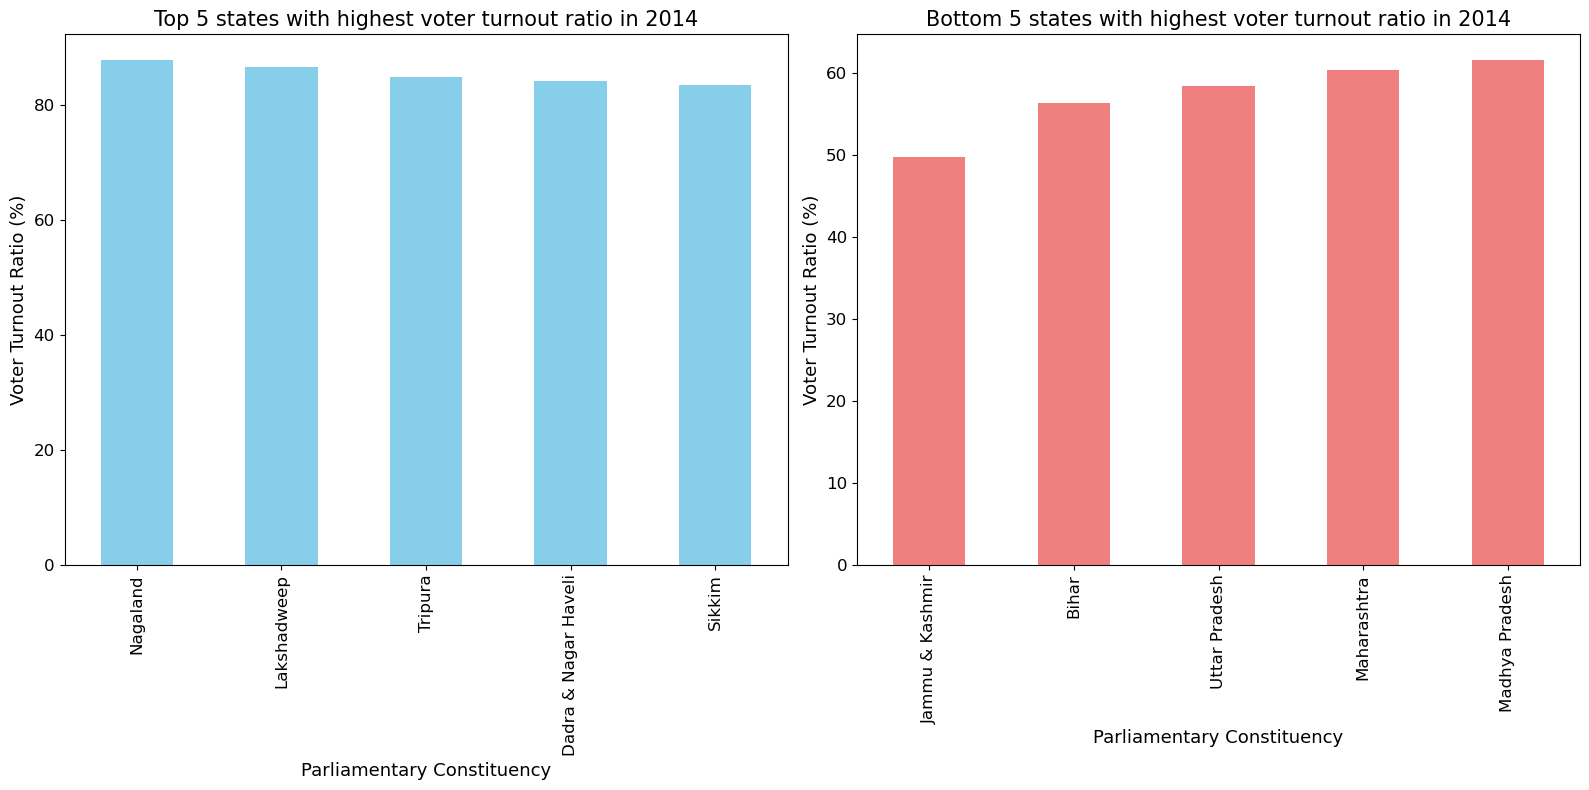

In [146]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16,8))
top5_state14.plot(kind='bar',ax=axes[0], color='skyblue')
axes[0].set_title('Top 5 states with highest voter turnout ratio in 2014',size=15)
axes[0].set_xlabel('Parliamentary Constituency', size=13)
axes[0].set_ylabel('Voter Turnout Ratio (%)', size=13)
axes[0].tick_params(axis='x', labelsize=12)
axes[0].tick_params(axis='y', labelsize=12)
bottom5_state14.plot(kind='bar',ax=axes[1], color='lightcoral')
axes[1].set_title('Bottom 5 states with highest voter turnout ratio in 2014',size=15)
axes[1].set_xlabel('Parliamentary Constituency', size=13)
axes[1].set_ylabel('Voter Turnout Ratio (%)', size=13)
axes[1].tick_params(axis='x', labelsize=12)
axes[1].tick_params(axis='y', labelsize=12)
plt.tight_layout()
plt.show()

In [147]:
#2019
#getting unique totalelectors per pc_name
unique_df_2019 = df_2019.drop_duplicates(subset=['pc_name'])

#getting totalelectors per state
total_electors_state19 = unique_df_2019.groupby('state')['total_electors'].sum()

#getting totalvotes per state
total_voters_state19 = df_2019.groupby('state')['total_votes'].sum()

#getting voter_turnout_ratio_2014 by state
voter_turnout_ratio_state19 = round((total_voters_state19/total_electors_state19)*100,2)

In [148]:
#top5
top5_state19 = voter_turnout_ratio_state19.sort_values(ascending=False).head(5)
top5_state19

state
Lakshadweep    85.18
Nagaland       82.91
Manipur        82.54
Tripura        82.35
West Bengal    81.72
dtype: float64

In [149]:
#bottom5
bottom5_state19 = voter_turnout_ratio_state19.sort_values().head(5)
bottom5_state19

state
Jammu & Kashmir    44.84
Bihar              57.30
Uttar Pradesh      59.18
NCT OF Delhi       60.58
Maharashtra        60.96
dtype: float64

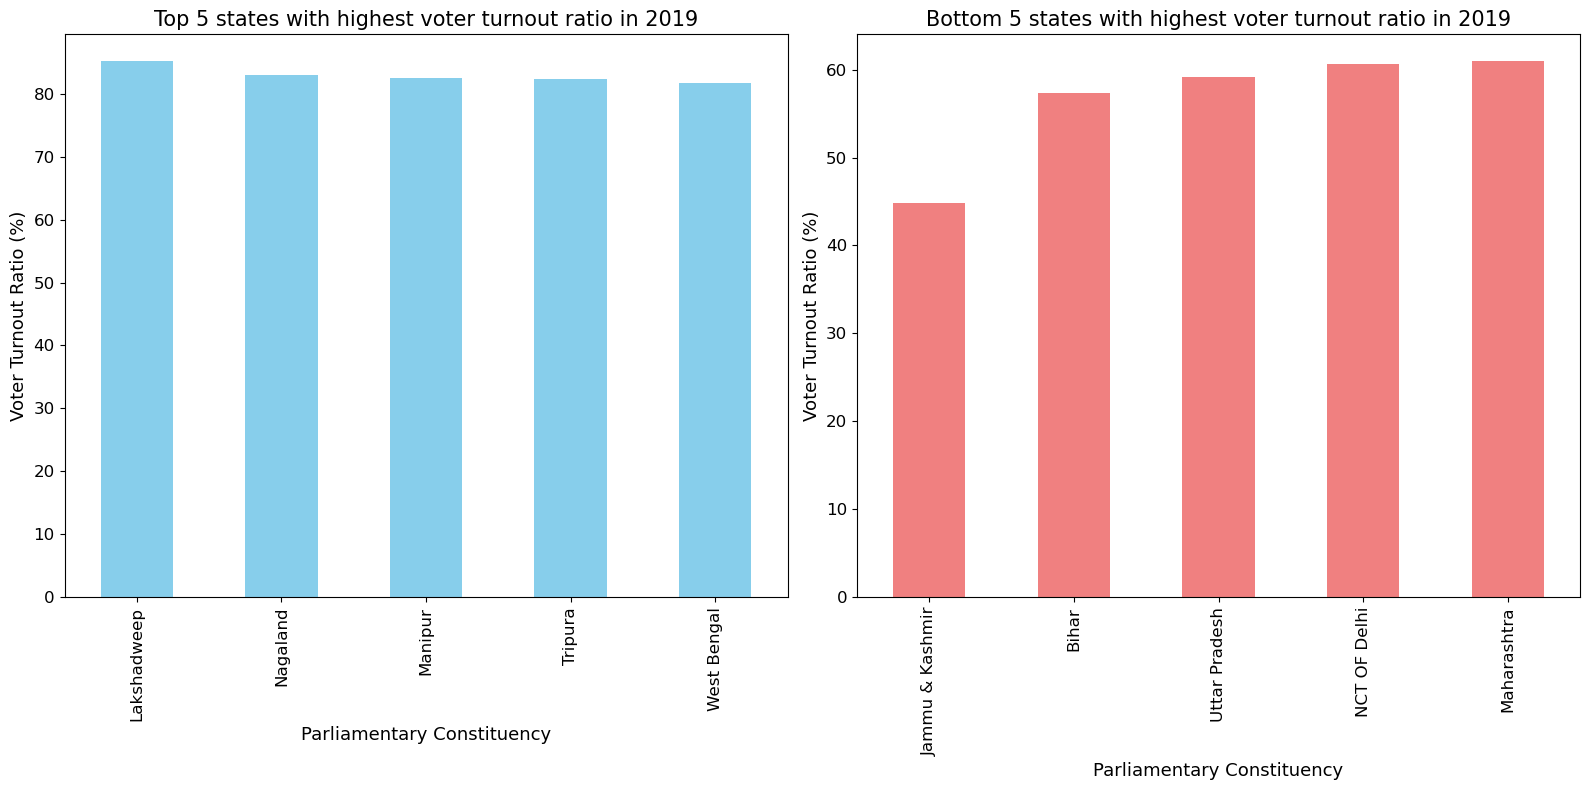

In [150]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16,8))
top5_state19.plot(kind='bar',ax=axes[0], color='skyblue')
axes[0].set_title('Top 5 states with highest voter turnout ratio in 2019',size=15)
axes[0].set_xlabel('Parliamentary Constituency', size=13)
axes[0].set_ylabel('Voter Turnout Ratio (%)', size=13)
axes[0].tick_params(axis='x', labelsize=12)
axes[0].tick_params(axis='y', labelsize=12)
bottom5_state19.plot(kind='bar',ax=axes[1], color='lightcoral')
axes[1].set_title('Bottom 5 states with highest voter turnout ratio in 2019', size=15)
axes[1].set_xlabel('Parliamentary Constituency', size=13)
axes[1].set_ylabel('Voter Turnout Ratio (%)', size=13)
axes[1].tick_params(axis='x', labelsize=12)
axes[1].tick_params(axis='y', labelsize=12)
plt.tight_layout()
plt.show()

In [151]:
#3. Which constituencies have elected the same party for two consecutive elections,
#rank them by % of votes to that winning party in 2019

#getting df of elected parties of 2014 & 2019
df_elected_party14 = df_2014.loc[df_2014.groupby('pc_name')['total_votes'].idxmax()]
df_elected_party19 = df_2019.loc[df_2019.groupby('pc_name')['total_votes'].idxmax()]
#removing warning block
import warnings
warnings.filterwarnings('ignore')

In [152]:
#mergetwodfforcomparison
df_merged_ep =pd.merge(df_elected_party14, df_elected_party19,on='pc_name',
suffixes=('_14','_19'))
#filteringpartieswinningconsecutively
df_matching_parties= df_merged_ep[df_merged_ep['party_14']==df_merged_ep['party_19']]
 #findingpercentage change
df_matching_parties['percentage_change']= round(((df_matching_parties['total_votes_19']
-df_matching_parties['total_votes_14'])/df_matching_parties['total_votes_19']*100),2)

#sortingby percentage
df_wp_ranked =df_matching_parties.sort_values(by='percentage_change',
ascending=False)
print(df_wp_ranked[['pc_name','party_14','total_votes_14','party_19','total_votes_19',
                    'percentage_change']])

                     pc_name party_14  total_votes_14 party_19  \
419    Samastipur (SC)_Bihar      LJP          270401      LJP   
266        Kodarma_Jharkhand      BJP          365410      BJP   
430       Shillong_Meghalaya      INC          209340      INC   
502           Wayanad_Kerala      INC          377035      INC   
131          Darbhanga_Bihar      BJP          314949      BJP   
..                       ...      ...             ...      ...   
130  Daman & diu_Daman & Diu      BJP           46960      BJP   
376    Peddapalle _Telangana      TRS          565496      TRS   
422           Sangrur_Punjab     AAAP          533237     AAAP   
267          Kokrajhar_Assam      IND          634428      IND   
265         Kishanganj_Bihar      INC          493461      INC   

     total_votes_19  percentage_change  
419          562443              51.92  
266          753016              51.47  
430          419689              50.12  
502          706367              46.62  
13

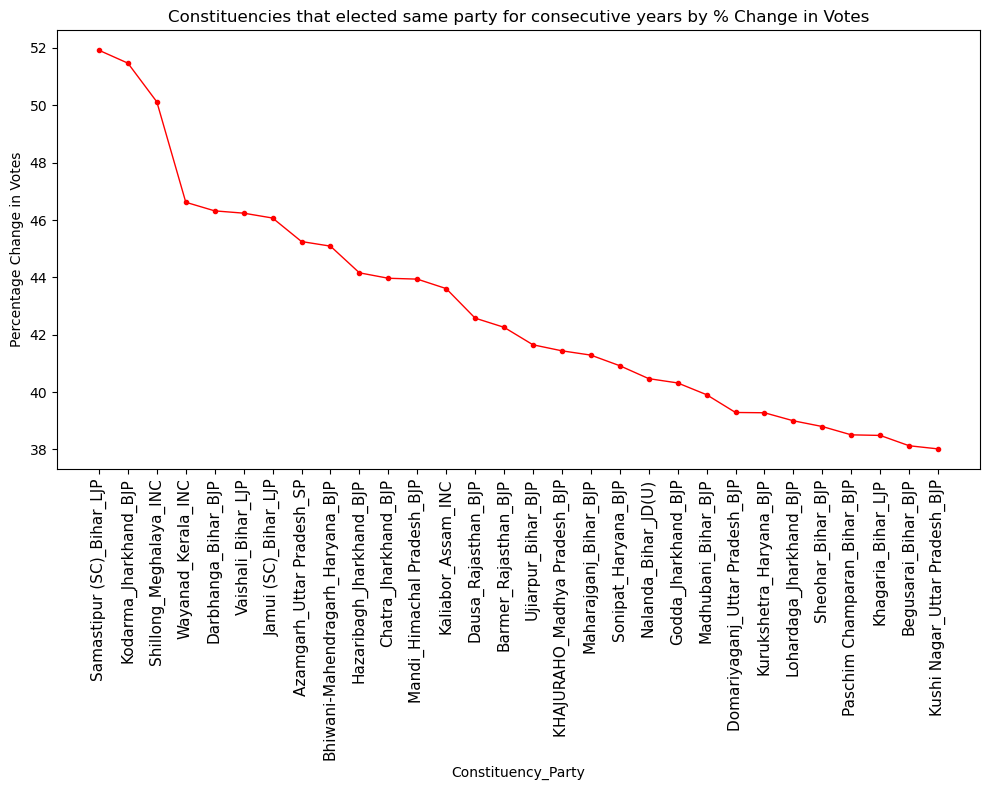

In [153]:
#Plotting constituencies that elected same party for consecutive years by % Change in
#Votes
#plotting top 30 constituencies
df_wp = df_wp_ranked.head(30)
#concatinating constituency and party name
labels = [f'{cons}_{party}' for cons, party in zip(df_wp['pc_name'],df_wp['party_14'])]

#plot
plt.figure(figsize=(10,8))
plt.plot(labels,df_wp['percentage_change'], 'r.-', linewidth=1)
plt.xlabel('Constituency_Party')
plt.ylabel('Percentage Change in Votes')
plt.title('Constituencies that elected same party for consecutive years by % Change in Votes')
plt.tick_params(axis='x', labelrotation=90, labelsize=11)
plt.tick_params(axis='y', labelsize=10)
plt.grid=True
plt.tight_layout()
plt.show()

In [155]:
#4. Which constituencies have voted for different parties in two elections (list top 10
#based on the difference (2019-2014) in voter percentage in two elections)

#getting df of elected parties of 2014 & 2019
df_elected_party14 = df_2014.loc[df_2014.groupby('pc_name')['total_votes'].idxmax()]
df_elected_party19 = df_2019.loc[df_2019.groupby('pc_name')['total_votes'].idxmax()]
 
#merge two df for comparison
df_merged_cp = pd.merge(df_elected_party14, df_elected_party19, on='pc_name', 
                        suffixes=('_14','_19'))
df_merged_cp['max_total_votes']=df_merged_cp[['total_votes_14',
                                              'total_votes_19']].max(axis=1)

#filtering constituencies where parties changed
df_changed_parties = df_merged_cp[df_merged_cp['party_14']!=df_merged_cp['party_19']]

In [156]:
#findingpercentage change
df_changed_parties['percentage_change'] = round(((df_changed_parties['total_votes_19']
                                                  -df_changed_parties

['total_votes_14'])/ df_changed_parties['max_total_votes']*100),2)
#sortingby percentage
df_cp_ranked =df_changed_parties.sort_values(by= 'percentage_change', 
                                             ascending=False).head(10)
print(df_cp_ranked[['pc_name','party_14','total_votes_14','party_19','total_votes_19',
                    'percentage_change']])

                       pc_name party_14  total_votes_14 party_19  \
13     Alipurduars_West Bengal     AITC          362453      BJP   
175     Ghazipur_Uttar Pradesh      BJP          306929      BSP   
420      Sambhal_Uttar Pradesh      BJP          360242       SP   
225          Jhanjharpur_Bihar      BJP          335481    JD(U)   
453               Supaul_Bihar      INC          332927    JD(U)   
42   Autonomous District_Assam      INC          213152      BJP   
116    Chikkballapur_Karnataka      INC          424800      BJP   
384      Puducherry_Puducherry    AINRC          255826      INC   
268            Kolar_Karnataka      INC          418926      BJP   
297            Madhepura_Bihar      RJD          368937    JD(U)   

     total_votes_19  percentage_change  
13           750804              51.72  
175          566082              45.78  
420          658006              45.25  
225          602391              44.31  
453          597377              44.27  
42   

In [157]:
#PlottingpercentageChangeinVotesfrom2014to2019byConstituency-PartyPair

 #concatinatingconstituencyandpartyname
labels = [f'{cons}_{party}' for cons,party in zip(df_cp_ranked['pc_name'],
                                                  df_cp_ranked['party_14'])]

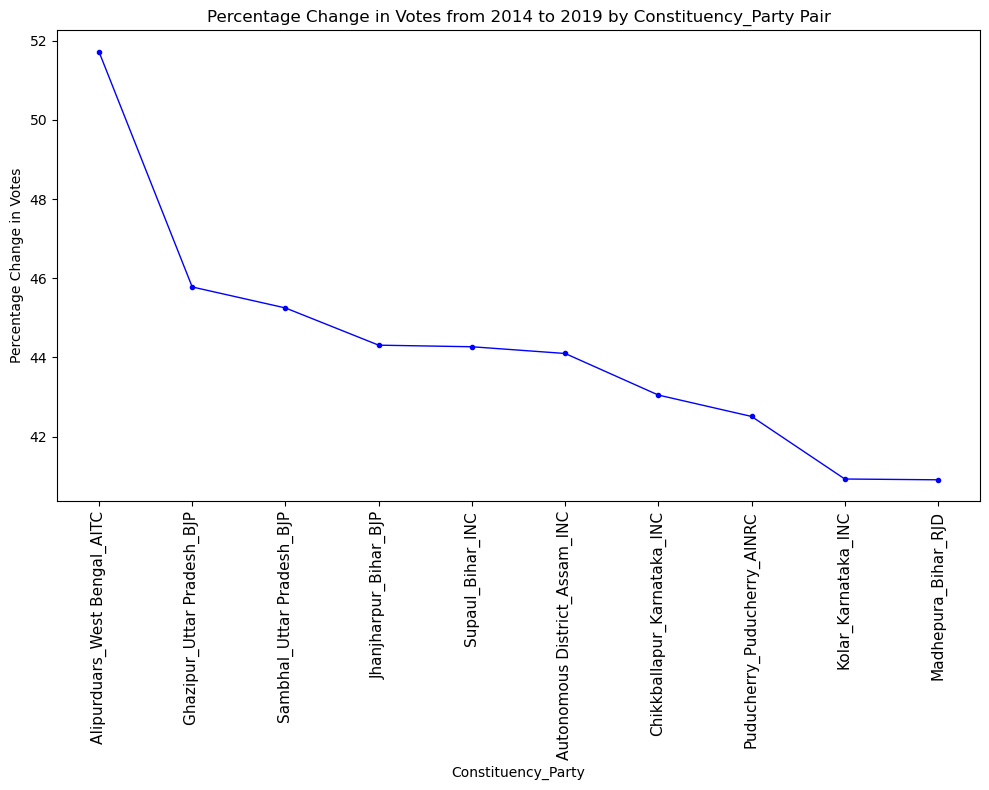

In [158]:
#plot
plt.figure(figsize=(10,8))
plt.plot(labels,df_cp_ranked['percentage_change'], 'b.-', linewidth=1)
plt.xlabel('Constituency_Party')
plt.ylabel('Percentage Change in Votes')
plt.title('Percentage Change in Votes from 2014 to 2019 by Constituency_Party Pair')
plt.tick_params(axis='x', labelrotation=90, labelsize=11)
plt.tick_params(axis='y', labelsize=10)
plt.grid=True
plt.tight_layout()
plt.show()

In [159]:
 #5. Top 5 candidates based on margin difference with runners in 2014 and 2019
 
#2014
#getting top 2 parties of each constituency
top2_parties14=df_2014.groupby('pc_name').apply(lambda x:x.nlargest(2,'total_votes',
    'all')).reset_index(drop=True)

In [161]:
#calculating difference between each

top2_parties14['margin_difference'] = top2_parties14.groupby('pc_name')\
    ['total_votes'].diff().abs()

 #filtering top 5 runners based on largest margin
top5_runners_margin = top2_parties14.nlargest(5, 'margin_difference')

 #filling NaN values
df_winners_runners = top2_parties14.fillna(method='bfill')

 #getting winners
top_winners = df_winners_runners.groupby('pc_name').apply(lambda 
x: x.nlargest(1, 'margin_difference')).reset_index(drop=True)

 #filtering top 5 winners based on largest margin
top5_winners_margin = top_winners.nlargest(5,'margin_difference')

In [162]:
 #merging both winners and runners
top_margin = pd.merge(top5_winners_margin,top5_runners_margin, on='pc_name')
 #renaming columns
top_margin.rename(columns = {'candidate_x':'winning_candidate',
 'candidate_y':'runner_candidate',
 'party_x':'winning_party',
 'party_y':'runner_party',
 'margin_difference_y':'margin_difference'},inplace=True)
 #printing both winners and runners by largest margin
print(top_margin[['pc_name','winning_candidate','winning_party','runner_candidate']])

                   pc_name        winning_candidate winning_party  \
0         Vadodara_Gujarat            NARENDRA MODI           BJP   
1  Ghaziabad_Uttar Pradesh        VIJAY KUMAR SINGH           BJP   
2          Navsari_Gujarat              C. R. PATIL           BJP   
3         Jaipur_Rajasthan         RAMCHARAN BOHARA           BJP   
4            Surat_Gujarat  DARSHANA VIKRAM JARDOSH           BJP   

                runner_candidate  
0       MISTRI MADHUSUDAN DEVRAM  
1                     RAJ BABBAR  
2                   MAKSUD MIRZA  
3               DR. MAHESH JOSHI  
4  DESAI NAISHADHBHAI BHUPATBHAI  


In [163]:
#getting top 2 parties of each constituency
top2_parties19=df_2019.groupby('pc_name').apply(lambda 
                                                x: x.nlargest(2,'total_votes', 'all'))  \
.reset_index(drop=True)

#calculating difference between each
top2_parties19['margin_difference']= top2_parties19.groupby('pc_name')['total_votes'].diff().abs()

#filtering top 5 runners based on largest margin
top5_runners_margin = top2_parties19.nlargest(5, 'margin_difference')

#filling NaN values
df_winners_runners = top2_parties19.fillna(method='bfill')

#getting winners
top_winners = df_winners_runners.groupby('pc_name') \
    .apply(lambda x: x.nlargest(1, 'margin_difference')).reset_index(drop=True)


#filtering top 5 winners based on largest margin
top5_winners_margin = top_winners.nlargest(5,'margin_difference')

#merging both winners and runners
top_margin = pd.merge(top5_winners_margin,top5_runners_margin, on='pc_name')

#renaming columns
top_margin.rename(columns = {'candidate_x':'winning_candidate',
 'candidate_y':'runner_candidate',
 'party_x':'winning_party',
 'party_y':'runner_party',
 'margin_difference_y':'margin_difference'},inplace=True)

#printing both winners and runners by largest margin
print(top_margin[['pc_name','winning_candidate','winning_party','runner_candidate']])

              pc_name        winning_candidate winning_party  \
0     Navsari_Gujarat              C. R. Patil           BJP   
1      Karnal_Haryana            Sanjay Bhatia           BJP   
2   Faridabad_Haryana              KRISHAN PAL           BJP   
3  Bhilwara_Rajasthan  SUBHASH CHANDRA BAHERIA           BJP   
4    Vadodara_Gujarat          RANJANBEN BHATT           BJP   

              runner_candidate  
0  PATEL DHARMESHBHAI BHIMBHAI  
1                Kuldip Sharma  
2          AVTAR SINGH BHADANA  
3               RAM PAL SHARMA  
4        PRASHANT PATEL (TIKO)  


In [164]:
#6. % Split of votes of parties between 2014 vs 2019 at national level

#votes for each party in 2014
party_votes14 = df_2014.groupby('party')['total_votes'].sum().reset_index()

#total votes in 2014 elections
total_votes14 = df_2014['total_votes'].sum()

 #calculating percentage per party
party_votes14['percentage'] = (party_votes14['total_votes']/total_votes14)*100

 #top 10 parties by percentage
top10_parties14 = party_votes14.sort_values(by='percentage', ascending=False).head(10)

 #votes for each party in 2019
 #total votes in 2019 elections
total_votes19 = df_2019['total_votes'].sum()

 #calculating percentage per party
party_votes19 = df_2019.groupby('party')['total_votes'].sum().reset_index()
party_votes19['percentage'] = (party_votes19['total_votes']/total_votes19)*100

 #top 10 parties by percentage
top10_parties19 = party_votes19.sort_values(by='percentage', ascending=False).head(10)

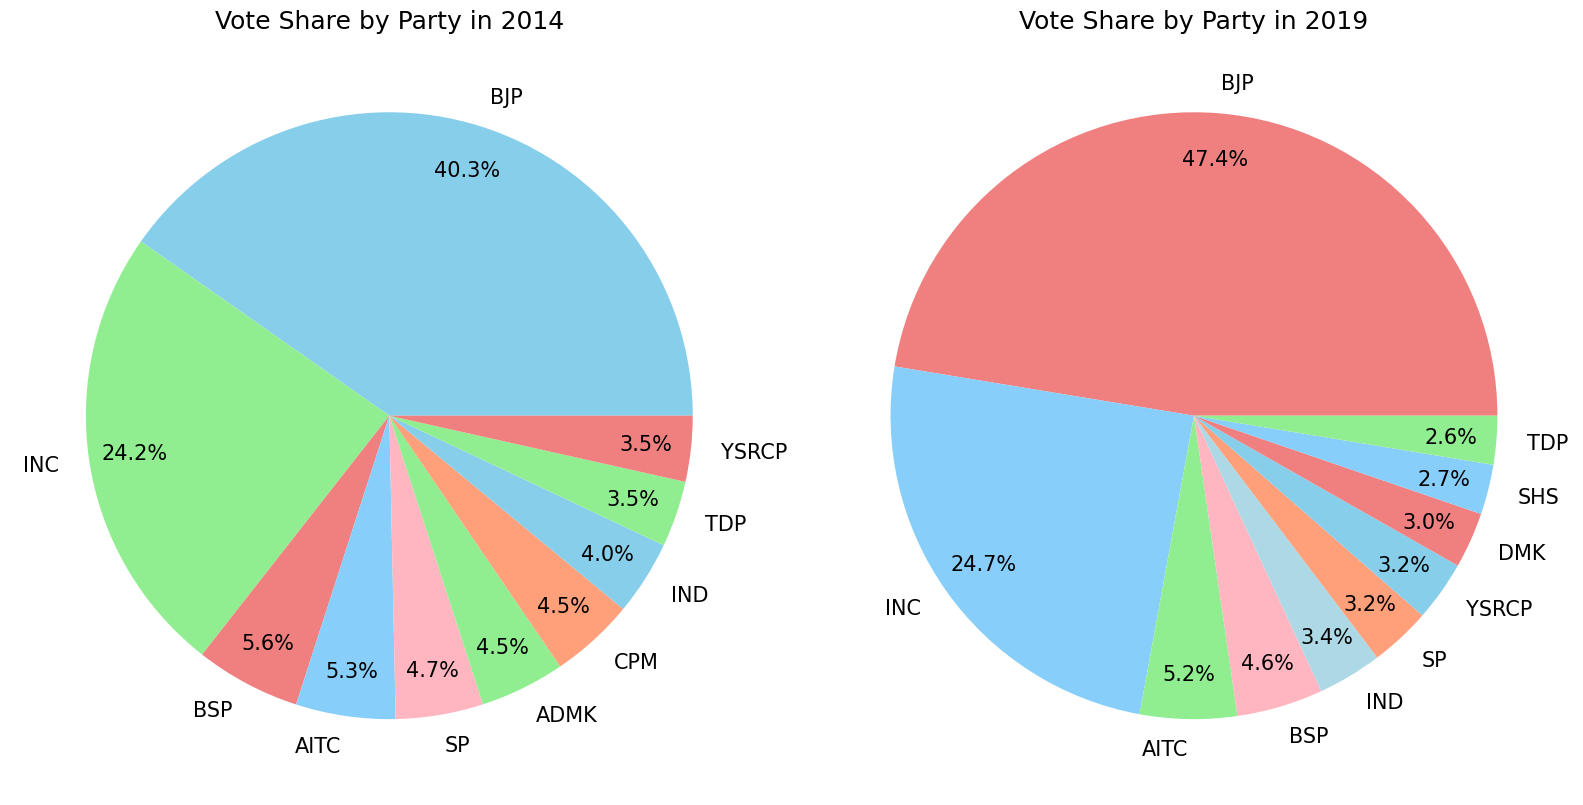

In [165]:
#setting variable for plotting
labels14 = top10_parties14['party']
share14 = top10_parties14['percentage']

labels19 = top10_parties19['party']
share19 = top10_parties19['percentage']
colors14 =['skyblue','lightgreen','lightcoral','lightskyblue','lightpink',
           'lightgreen','lightsalmon']
colors19 = ['lightcoral','lightskyblue','lightgreen','lightpink','lightblue',
            'lightsalmon','skyblue']

 #plotting pie chart showing % split of votes of parties between 2014 vs 2019 at national level
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16,8))
share14.plot(kind='pie', ax=axes[0], colors=colors14, labels=labels14,autopct='%1.1f%%', 
             pctdistance=0.85, textprops = {'fontsize': 15})
axes[0].set_title('Vote Share by Party in 2014', size=18)
axes[0].set_ylabel('')
share19.plot(kind='pie', ax=axes[1], colors=colors19, labels=labels19,autopct='%1.1f%%', 
             pctdistance=0.85, textprops = {'fontsize': 15})
axes[1].set_title('Vote Share by Party in 2019', size=18)
axes[1].set_ylabel('')
plt.tight_layout()
plt.show()

In [166]:
# 7. % Split of votes of parties between 2014 vs 2019 at state level
 
#2014
#grouping votes by states
state_votes14 = df_2014.groupby(['state','party'])['total_votes'].sum().reset_index()
 #total votes
total_state_votes14 = state_votes14['total_votes'].sum()
 #calculating votes percentage
state_votes14['vote_share']=(state_votes14['total_votes']/total_state_votes14)*100
 #sorting top20 states for plotting
sorted_state_votes14 = state_votes14.sort_values(by='vote_share',ascending=False).head(20)
 #plotting graph
fig = px.bar(sorted_state_votes14, x='vote_share', y='state',color='party',orientation='h',
             labels={'state':'State', 'vote_share':'Vote Share%', 'party':'Party'},
title='Vote Share of Parties in Top States in 2014',
hover_data={'vote_share': ':.2f'})
fig.update_layout(yaxis={'categoryorder':'total ascending'},
xaxis=dict(title='Vote Share (%)'),
legend_title='Party',
width=1000, height=450)
fig.show()

In [167]:
 #2019
 #grouping votes by states
 state_votes19 = df_2019.groupby(['state','party'])['total_votes'].sum().reset_index()
 #total votes
 total_state_votes19 = state_votes19['total_votes'].sum()
 #calculating votes percentage
 state_votes19['vote_share']=(state_votes19['total_votes']/total_state_votes19)*100
 #sorting top20 states for plotting
 sorted_state_votes19 = state_votes19.sort_values(by='vote_share',ascending=False).head(20)
 #plotting graph
 fig = px.bar(sorted_state_votes19, x='vote_share', y='state',color='party',orientation='h',
              labels={'state':'State', 'vote_share':'Vote Share%', 'party':'Party'},
 title='Vote Share of Parties in Top States in 2019',
 hover_data={'vote_share': ':.2f'})
 fig.update_layout(yaxis={'categoryorder':'total ascending'},
                   xaxis=dict(title='Vote Share (%)'),
 legend_title='Party',
 width=1000, height=450)
 fig.show()

In [ ]:
 #8. List top 5 constituencies for two major national parties where they have gained
 #vote share in 2019 as compared to 2014
 
#2 major national parties
national_parties = ['BJP','INC']
 #pivoting df
party_votes14 = df_2014.groupby(['pc_name','party'])['total_votes'].sum().unstack(fill_value=0)
party_votes19 = df_2019.groupby(['pc_name','party'])['total_votes'].sum().unstack(fill_value=0)
 #substracting pivotted df to get difference in votes
vote_share_gained = party_votes19- party_votes14
 #filtering difference for only major parties
national_parties_votes = vote_share_gained[national_parties]
 #sorting by top5
top5_constituencies_BJP = national_parties_votes['BJP'].sort_values(ascending=False).head(5)
top5_constituencies_INC = national_parties_votes['INC'].sort_values(ascending=False).head(5)
 #printing result

print("Top 5 constituencies where BJP gained vote share:")
print(top5_constituencies_BJP)
print("\nTop 5 constituencies where INC gained vote share:")
 print(top5_constituencies_INC)

Top 5 constituencies where BJP gained vote share:
pc_name
Sirsa_Haryana           714351.0
Hisar_Haryana           603289.0
Madha_Maharashtra       586314.0
Purulia_West Bengal     581871.0
Ranaghat_West Bengal    549583.0
Name: BJP, dtype: float64

Top 5 constituencies where INC gained vote share:
pc_name
Thiruvallur _Tamil Nadu       723332.0
Karur_Tamil Nadu              665238.0
Arani_Tamil Nadu              590043.0
Krishnagiri_Tamil Nadu        572413.0
Tiruchirappalli_Tamil Nadu    569748.0
Name: INC, dtype: float64


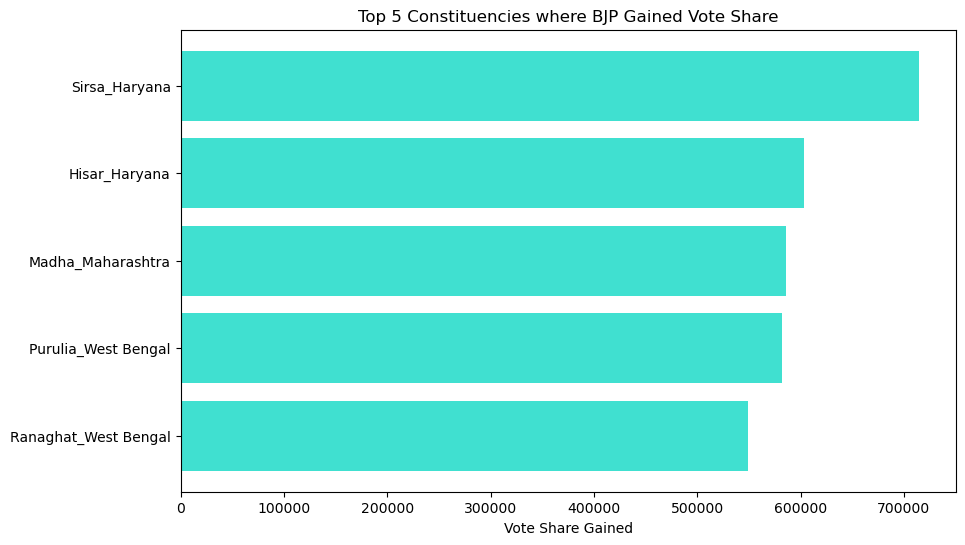

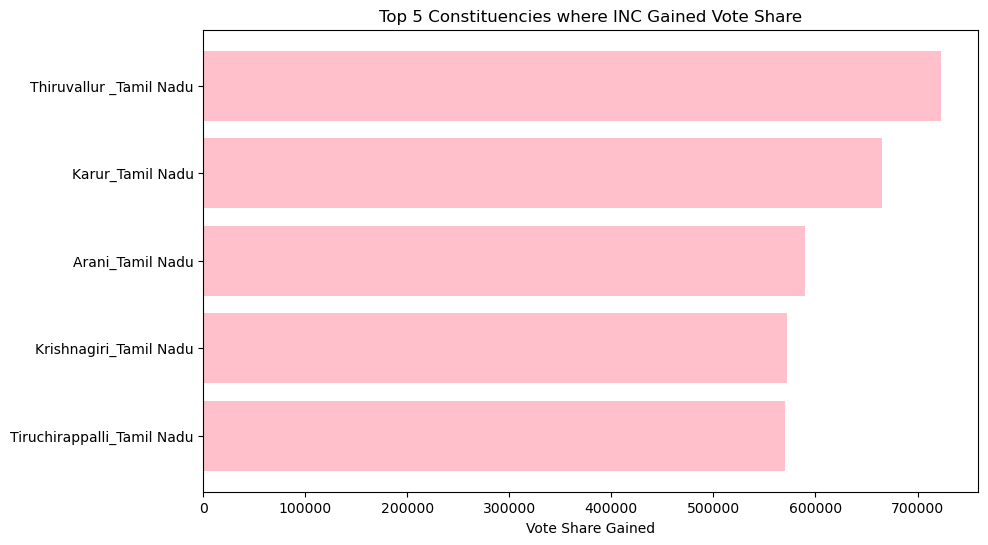

In [ ]:
#plotting for BJP
plt.figure(figsize=(10,6))
plt.barh(top5_constituencies_BJP.index, top5_constituencies_BJP,color='turquoise')
plt.xlabel('Vote Share Gained')
plt.title('Top 5 Constituencies where BJP Gained Vote Share')
plt.gca().invert_yaxis()
plt.show()
#plotting for INC
plt.figure(figsize=(10,6))
plt.barh(top5_constituencies_INC.index, top5_constituencies_INC, color='pink')
plt.xlabel('Vote Share Gained')
plt.title('Top 5 Constituencies where INC Gained Vote Share')
plt.gca().invert_yaxis()
plt.show()

In [ ]:
#9. List top 5 constituencies for two major national parties where they have lost vote 
# share in 2019 as
 
# compared to 2014

 #2 major national parties
national_parties = ['BJP','INC']

#pivoting df
party_votes14 = df_2014.groupby(['pc_name','party'])['total_votes'].sum().unstack(fill_value=0)
party_votes19 = df_2019.groupby(['pc_name','party'])['total_votes'].sum().unstack(fill_value=0)

 #substracting pivotted df to get difference in votes
vote_share_gained = party_votes19- party_votes14

 #replacing votes to NaN where it is 0 or more
vote_share_gained[vote_share_gained>=0] = np.nan

 #filtering difference for only major parties
national_parties_votes = vote_share_gained[national_parties]

 #sorting by top5
top5_constituencies_lost_BJP = national_parties_votes['BJP'].sort_values(ascending=True).head(5)
top5_constituencies_lost_INC = national_parties_votes['INC'].sort_values(ascending=True).head(5)

 #printing result
print("Top 5 constituencies where BJP lost vote share:")
print(top5_constituencies_lost_BJP)
print("\nTop 5 constituencies where INC lost vote share:")
print(top5_constituencies_lost_INC)

Top 5 constituencies where BJP lost vote share:
pc_name
Palghar _Maharashtra           -533201.0
Visakhapatnam_Andhra Pradesh   -532940.0
Narsapuram_Andhra Pradesh      -527892.0
Tirupati _Andhra Pradesh       -526826.0
Gopalganj (SC)_Bihar           -478773.0
Name: BJP, dtype: float64

Top 5 constituencies where INC lost vote share:
pc_name
Mandya_Karnataka           -518852.0
Hatkanangle_Maharashtra    -462618.0
Tumkur_Karnataka           -429868.0
Hassan_Karnataka           -409379.0
Uttara Kannada_Karnataka   -406239.0
Name: INC, dtype: float64


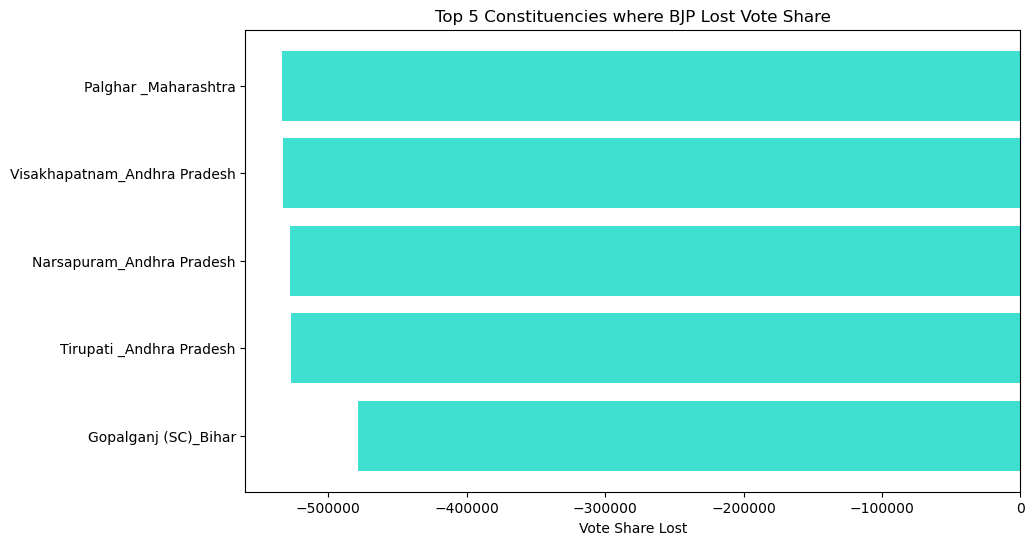

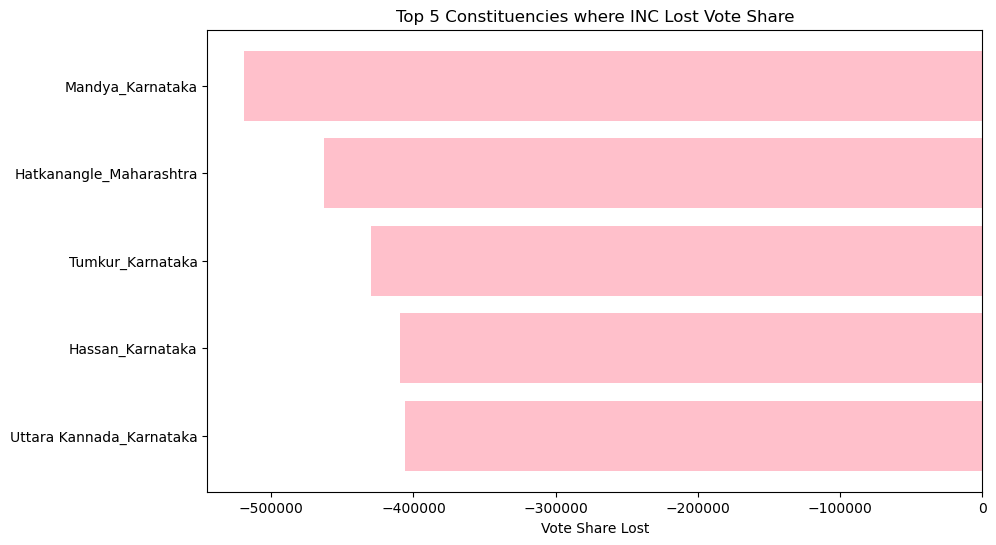

In [ ]:
 #plotting for BJP
plt.figure(figsize=(10,6))

plt.barh(top5_constituencies_lost_BJP.index, top5_constituencies_lost_BJP,color='turquoise')
plt.xlabel('Vote Share Lost')
plt.title('Top 5 Constituencies where BJP Lost Vote Share')
plt.gca().invert_yaxis()
plt.show()
 #plotting for INC
plt.figure(figsize=(10,6))
plt.barh(top5_constituencies_lost_INC.index, top5_constituencies_lost_INC,color='pink')
plt.xlabel('Vote Share Lost')
plt.title('Top 5 Constituencies where INC Lost Vote Share')
plt.gca().invert_yaxis()
plt.show()

In [ ]:
#10. Which constituency has voted the most for NOTA?

 #2014
#getting NOTA for each constituencies
nota14 = df_2014[df_2014['candidate']=='None of the Above']
#sorting by most votes
sorted_nota14 = nota14.sort_values(by='total_votes', ascending=False).head(10)
#removing suffiexes of state from constituency
sorted_nota14['pc_name'] = sorted_nota14['pc_name'].str.split('_').str[0]
#plotting
fig = px.bar(sorted_nota14, x='pc_name', y='total_votes', 
             title='Total NOTA votes per constituency in 2014',
text='total_votes', width=1000, height=450)
fig.update_traces(textposition='inside')
fig.show()

In [ ]:
#2019
#getting NOTA for each constituencies
nota19 = df_2019[df_2019['candidate']=='NOTA']

 #sorting by most votes
sorted_nota19 = nota19.sort_values(by='total_votes', ascending=False).head(10)

 #removing suffiexes of state from constituency
sorted_nota19['pc_name'] = sorted_nota19['pc_name'].str.split('_').str[0]

 #plotting
fig = px.bar(sorted_nota19, x='pc_name', y='total_votes', 
             title='Total NOTA votes per constituency in 2019',
text='total_votes', width=1000, height=450)
fig.update_traces(textposition='inside')
fig.show()

In [169]:
#11. Which constituencies have elected candidates whose party has less than 10% vote share at state level 
# in 2019

# Calculating total votes cast for each party in each constituency
party_votes = df_2019.groupby(['state','pc_name','candidate',
                               'party'])['total_votes'].sum().reset_index()

 # Determining the winning party for each constituency
winning_party_indices = party_votes.groupby('pc_name')['total_votes'].idxmax()
winning_party = party_votes.loc[winning_party_indices]

 # Calculating total votes cast in each state
total_votes_state = df_2019.groupby('state')['total_votes'].sum().reset_index()
 #merging the two df
winning_parties = pd.merge(winning_party, total_votes_state, on='state',
                           suffixes=['_party','_total'])

 # Calculating percentage vote share for the winning party in each constituency␣by state
winning_parties['vote_share_percentage'] =(winning_parties['total_votes_party']/
                                           winning_parties['total_votes_total'])*100

 #Identifying constituencies with less than 10% vote share
constituencies_less_than_10_percent = winning_parties[winning_parties['vote_share_percentage']<10]
[['pc_name','candidate','party','vote_share_percentage']]

 #printing constituencies name
print("Constituencies wherethewinningparty'svoteshareislessthan10%at thestate levelin2019:")
print(constituencies_less_than_10_percent.sort_values(by='vote_share_percentage').head(10))


Constituencies wherethewinningparty'svoteshareislessthan10%at thestate levelin2019:
            state                         pc_name             candidate party  \
67  Uttar Pradesh         Kaushambi_Uttar Pradesh    VINOD KUMAR SONKAR   BJP   
85  Uttar Pradesh        Pratapgarh_Uttar Pradesh      SANGAM LAL GUPTA   BJP   
94  Uttar Pradesh         Shrawasti_Uttar Pradesh         RAM SHIROMANI   BSP   
88  Uttar Pradesh       Robertsganj_Uttar Pradesh       PAKAURI LAL KOL  ADAL   
96  Uttar Pradesh         Sultanpur_Uttar Pradesh  MANEKA SANJAI GANDHI   BJP   
92  Uttar Pradesh  Sant Kabir Nagar_Uttar Pradesh  PRAVEEN KUMAR NISHAD   BJP   
90  Uttar Pradesh          Salempur_Uttar Pradesh              RAVINDER   BJP   
24  Uttar Pradesh            Amethi_Uttar Pradesh          Smriti Irani   BJP   
66  Uttar Pradesh            Kanpur_Uttar Pradesh     Satyadev Pachauri   BJP   
31  Uttar Pradesh            Ballia_Uttar Pradesh        Virendra Singh   BJP   

    total_votes_party  t

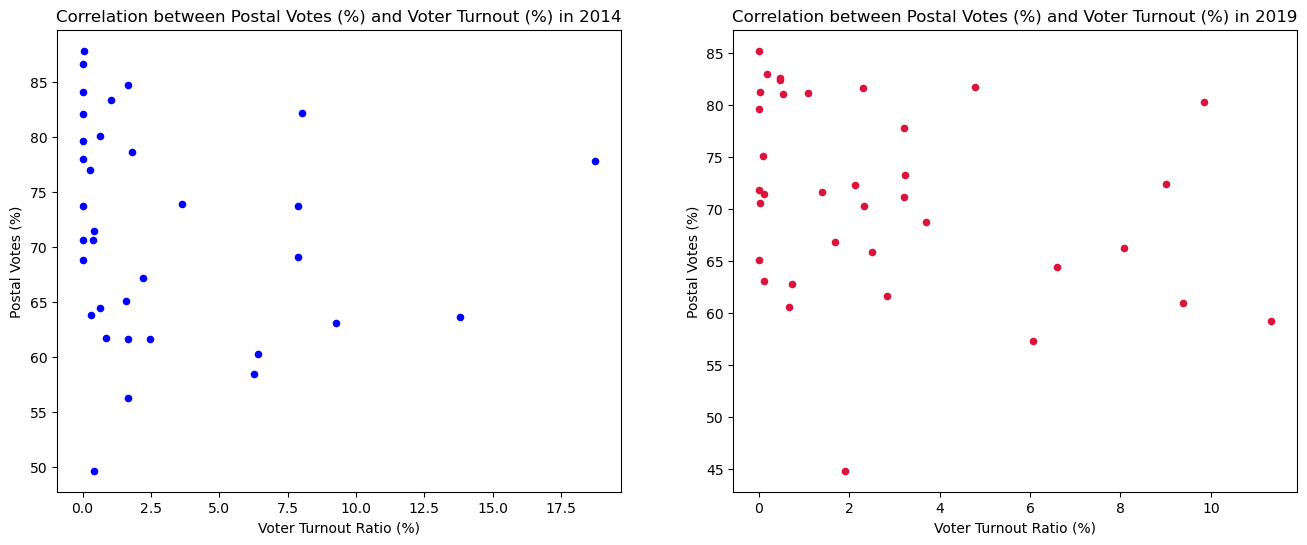

In [ ]:
#12. Isthereacorrelationbetweenpostalvotes%andvoterturnout%?

#2014
 #postal votesof states
postal_votes_state14 =df_2014.groupby('state')['postal_votes'].sum()

 #totalpostalvotes ofcountry
postal_votes_total14 =df_2014['postal_votes'].sum()

 #postal votes%
postal_votes_pct14= round((postal_votes_state14/postal_votes_total14)*100,2)

 #filteringtotal electorsperconstituency
unique_df_2014= df_2014.drop_duplicates(subset=['pc_name'])

 #totalelectors state
total_electors_state14= unique_df_2014.groupby('state')['total_electors'].sum()

total_electors_state14
 #total votes state
total_votes_state14 = df_2014.groupby('state')['total_votes'].sum()
 #voter turnout%
voter_turnout_pct14 = round((total_votes_state14/total_electors_state14)*100,2)
 #creating correlation dataframe
correlation_df_2014 = pd.DataFrame({'Postal Votes (%) 2014':postal_votes_pct14,
 'Voter Turnout (%) 2014':voter_turnout_pct14})
 #------------------------------------------------------------------------------------------

#2019
 #postal votes of states
postal_votes_state19 = df_2019.groupby('state')['postal_votes'].sum()
 #total postal votes of country
postal_votes_total19 = df_2019['postal_votes'].sum()
 #postal votes%
postal_votes_pct19 = round((postal_votes_state19/postal_votes_total19)*100,2)
 #filtering total electors per constituency
unique_df_2019 = df_2019.drop_duplicates(subset=['pc_name'])
 #total electors state
total_electors_state19 = unique_df_2019.groupby('state')['total_electors'].sum()
total_electors_state19
 #total votes state
total_votes_state19 = df_2019.groupby('state')['total_votes'].sum()
 #voter turnout%
voter_turnout_pct19 = round((total_votes_state19/total_electors_state19)*100,2)
 #creating correlation dataframe
correlation_df_2019 = pd.DataFrame({'Postal Votes (%) 2019':postal_votes_pct19,
 'Voter Turnout (%) 2019':voter_turnout_pct19})
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16,6))
correlation_df_2014.plot(kind='scatter', ax=axes[0], 
                         color='blue', x='Postal Votes (%) 2014', 
                         y='Voter Turnout (%) 2014')

axes[0].set_title('Correlation between Postal Votes (%) and Voter Turnout (%) in 2014')
axes[0].set_ylabel('Postal Votes (%)')
axes[0].set_xlabel('Voter Turnout Ratio (%)')
correlation_df_2019.plot(kind='scatter', ax=axes[1], color='crimson', 
                         x='Postal Votes (%) 2019', 
                         y='Voter Turnout (%) 2019')
axes[1].set_title('Correlation between Postal Votes (%) and Voter Turnout (%) in 2019')
axes[1].set_ylabel('Postal Votes (%)')
axes[1].set_xlabel('Voter Turnout Ratio (%)')
plt.tight_layout
plt.show()

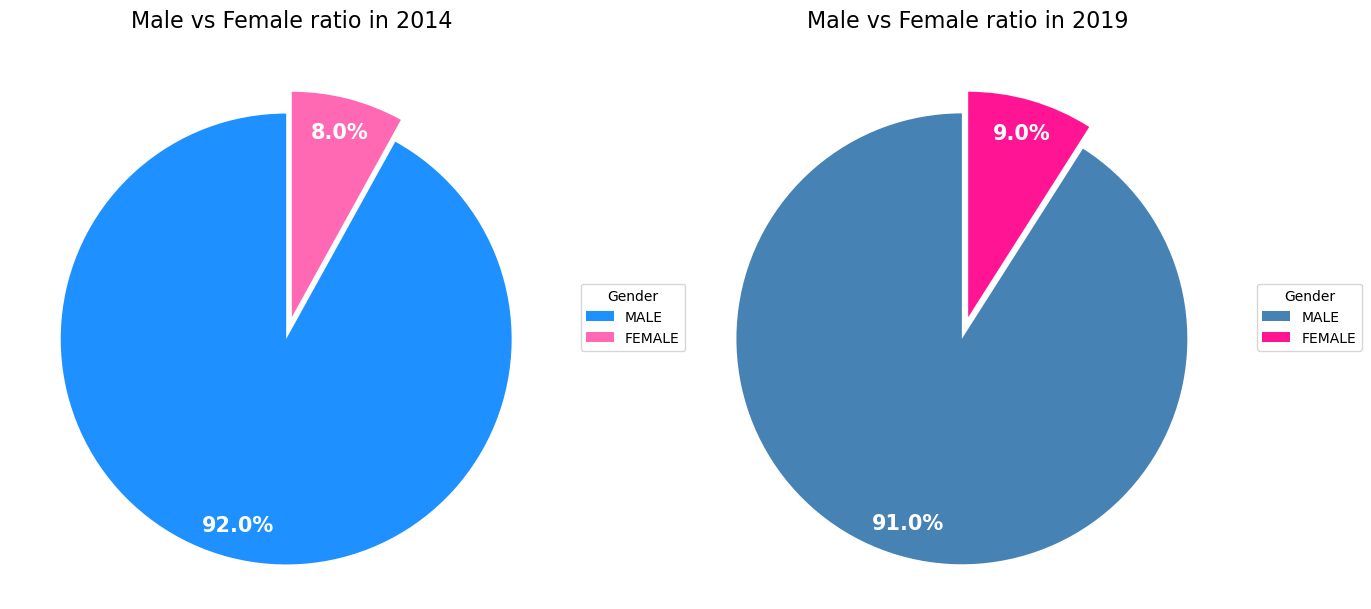

In [ ]:
#13. Candidates ratio based on gender in 2014 and 2019

#gender count from 2014
male_candidates14 = (df_2014['sex']=='M').sum()
female_candidates14 = (df_2014['sex']=='F').sum()

#gender count from 2019
male_candidates19 = (df_2019['sex']=='MALE').sum()
female_candidates19 = (df_2019['sex']=='FEMALE').sum()

 #setting up values in list/arrays
data14 = [male_candidates14,female_candidates14]
data19 = [male_candidates19,female_candidates19]
labels_mf = ['MALE','FEMALE']
explodeTuple = (0.1, 0.0)
color14 = ['dodgerblue','hotpink']
color19 = ['steelblue','deeppink']

 #plotting
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16,8))
axes[0].pie(data14, colors=color14, explode=(0.1,0.0), 
            labels=labels_mf,autopct='%1.1f%%',
            pctdistance=0.85, startangle=90, 
            textprops={'color':"w", 'size':15,'weight':'bold'})

axes[0].set_title('Male vs Female ratio in 2014', size=16)
axes[0].legend(labels_mf, title="Gender", loc="center left", bbox_to_anchor=(1,0, 0.5, 1))
axes[1].pie(data19, colors=color19, explode=(0.1,0.0), 
            labels=labels_mf,autopct='%1.1f%%',
pctdistance=0.85, startangle=90, textprops={'color':"w", 'size':15,'weight':'bold'})
axes[1].set_title('Male vs Female ratio in 2019', size=16)
axes[1].legend(labels_mf, title="Gender", loc="center left", bbox_to_anchor=(1,0, 0.5, 1))
plt.show()
